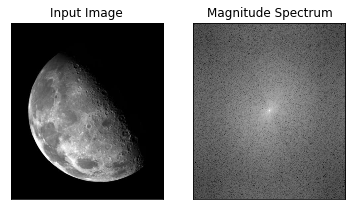

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
img = cv2.imread('images/moon.jpg',0)

dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT) #the Fourier or frequency domain
dft_shift = np.fft.fftshift(dft)


magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

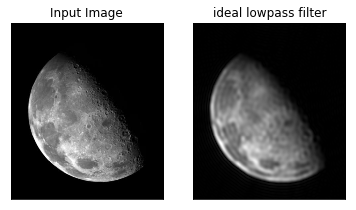

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

img = cv2.imread('images/moon.jpg',0)

dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

height, width = img.shape # size img


R=30
H = np.zeros([height, width,2], dtype=np.uint8) #Return an array of zeros with shape and type of input.

for v in range(0, height):
    for u in range(0, width):
        D = ((v - height/2)**2 + (u - width/2)**2)**0.5
        if D <= R:
            H[v][u] = 1
       
    

m = dft_shift * H

#mm = cv2.idft(m)
f_ishift = np.fft.ifftshift(m)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('ideal lowpass filter'),plt.xticks([]), plt.yticks([])
plt.show()

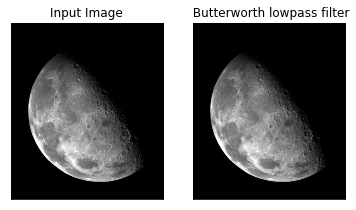

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

img = cv2.imread('images/moon.jpg',0)

dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

height, width = img.shape


R=50 
H = np.zeros([height, width,2], dtype=np.uint8)

for v in range(0, height):
    for u in range(0, width):
        D1 = 1/1+(((v - height/2)**2 + (u - width/2)**2)**0.5/R)**2*3   
    
m1 = dft_shift * D1


f_ishift = np.fft.ifftshift(m1)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title(' Butterworth lowpass filter'),plt.xticks([]), plt.yticks([])
plt.show()

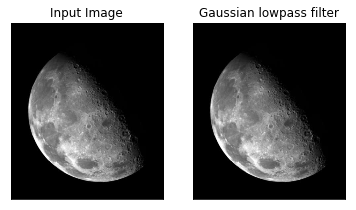

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import math
img = cv2.imread('images/moon.jpg',0)

dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT) #the Fourier or frequency domain
dft_shift = np.fft.fftshift(dft)

height, width = img.shape


R=50
e=20
H = np.zeros([height, width,2], dtype=np.uint8)
 
for v in range(0, height):
    for u in range(0, width):
        G = e**(math.exp(-(((v - height/2)**2 + (u - width/2)**2)**0.5**2)/2*R**2))    

m2 = dft_shift * G


f_ishift = np.fft.ifftshift(m2)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Gaussian lowpass filter'),plt.xticks([]), plt.yticks([])
plt.show()